## Number crunching for 2020 tax year

In [1]:
import sympy as sp
import matplotlib
%matplotlib notebook
from ipywidgets import *

# matplotlib.rc('lines', linewidth=2, color='g')
matplotlib.rcParams['axes.grid'] = True

| AGI Federal Tax Brackets |  Definitions     |
|:-------------------------|:-----------| 
|![tax_brackets](https://i2.wp.com/moneysavvymindset.com/wp-content/uploads/2019/11/Federal-income-tax-rates-for-single-unmarried-2020.png?resize=589%2C228&ssl=1)| <ul><li>[Gross Income(GI)](https://www.investopedia.com/terms/g/grossincome.asp): Includes your wages, dividends, capital gains, business income, retirement distributions as well as other income</li><br><li>[Adjustments to Income](https://apps.irs.gov/app/vita/content/globalmedia/4491_adjustments_to_income.pdf): contributions to retirement accounts (401K, IRA, HSA, etc), student loans, mortgage interest, etc</li><br><li>[Adjusted Gross Income(AGI):](https://www.irs.gov/e-file-providers/definition-of-adjusted-gross-income) Gross Income minus adjustments to income (deductions or exemptions). Also known as **taxable income**.</li><br><li>For single tax payers the standard deduction is $12,400</li></ul>|


## Lets make a piece wise equation from the table

In [2]:
AGI, GI, deductions = sp.symbols('AGI GI deductions')
AGI = GI - deductions
STANDARD_DEDUCTION=12400

tax_fed=sp.Piecewise((0,                          AGI<0),
                     (0.10*AGI,                   AGI<=9875), 
                     (987.50  + 0.12*(AGI-9875),  AGI<=40125),
                     (4617.50 + 0.22*(AGI-40125), AGI<=85525),
                     (14605.5 + 0.24*(AGI-85525), AGI<=163000),
                     (33271.5 + 0.32*(AGI-163300),AGI<=207350),
                     (47367.5 + 0.35*(AGI-207350),AGI<=518400),
                     (156235  + 0.37*(AGI-518401),True))

tax_fed

Piecewise((0, GI - deductions < 0), (0.1*GI - 0.1*deductions, GI - deductions <= 9875), (0.12*GI - 0.12*deductions - 197.5, GI - deductions <= 40125), (0.22*GI - 0.22*deductions - 4210.0, GI - deductions <= 85525), (0.24*GI - 0.24*deductions - 5920.5, GI - deductions <= 163000), (0.32*GI - 0.32*deductions - 18984.5, GI - deductions <= 207350), (0.35*GI - 0.35*deductions - 25205.0, GI - deductions <= 518400), (0.37*GI - 0.37*deductions - 35573.37, True))

## Let's look at  Federal tax of a salaried employee taking the standard deduction

<IPython.core.display.Javascript object>


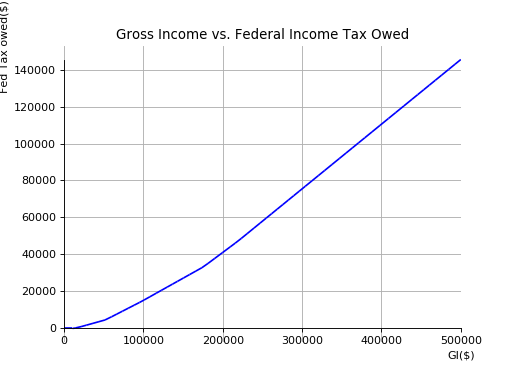

NOTE: Single salaried employee taking the standard deduction


In [4]:
sp.plotting.plot(tax_fed.subs(deductions,STANDARD_DEDUCTION), (GI, 0, 500000),
                       title='Gross Income vs. Federal Income Tax Owed', ylabel='Fed Tax owed($)', xlabel='GI($)', line_color='blue')
print("NOTE: Single salaried employee taking the standard deduction")

### Different visual; Percentage of AGI paid to Federal Taxes

<IPython.core.display.Javascript object>


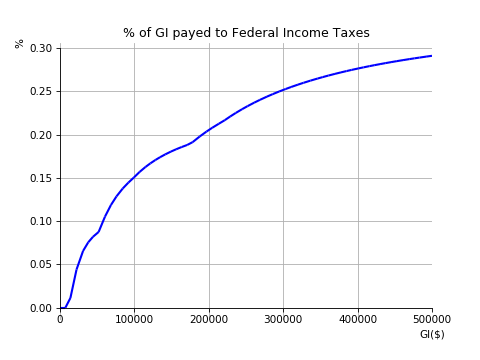

NOTE: Single salaried employee taking the standard deduction


In [263]:
sp.plotting.plot(tax_fed.subs(deductions,STANDARD_DEDUCTION)/GI, (GI, 0, 500000),
                       title='% of GI payed to Federal Income Taxes', ylabel='%', xlabel='GI($)', line_color='blue')
print("NOTE: Single salaried employee taking the standard deduction")

----
### Salaried employees also owe payroll taxes (FICA): Social Security(OASDI) and Medicare(HI) taxes
- [FICA tax breakdown](https://www.ssa.gov/news/press/factsheets/colafacts2020.pdf)
- [additional medicare tax](https://www.irs.gov/businesses/small-businesses-self-employed/questions-and-answers-for-the-additional-medicare-tax)

In [5]:
ss_tax = sp.Piecewise((0.062*GI,  GI<137700),
                      (8537.4,    True))

medicare_tax = sp.Piecewise( (0.0145*GI,        GI<200000),
                            ((0.0145+0.009)*GI, True))

tax_FICA = ss_tax + medicare_tax
tax_FICA

Piecewise((0.0145*GI, GI < 200000), (0.0235*GI, True)) + Piecewise((0.062*GI, GI < 137700), (8537.4, True))

<IPython.core.display.Javascript object>


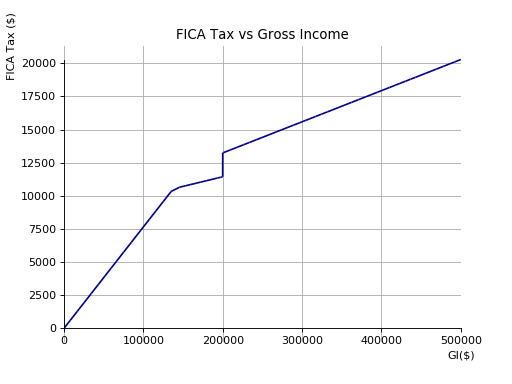

NOTE: Single salaried employee taking the standard deduction. No deductions can be made on FICA(?)


In [8]:
sp.plotting.plot(tax_FICA, (GI, 0, 500000),
                 title='FICA Tax vs Gross Income', ylabel='FICA Tax ($)', xlabel='GI($)', line_color='darkblue')
print("NOTE: Single salaried employee taking the standard deduction. No deductions can be made on FICA(?)")

----
## Combine Federal and FICA taxes

<IPython.core.display.Javascript object>


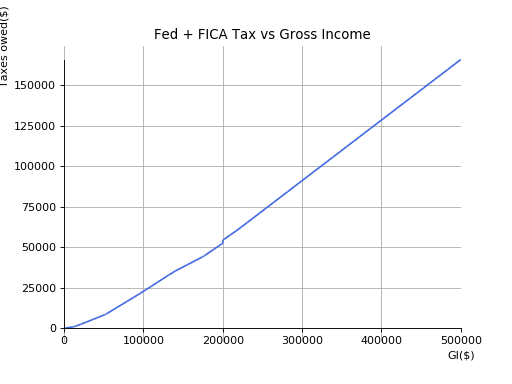

NOTE: Single salaried employee taking the standard deduction


In [9]:
fed_and_FICA = tax_fed + tax_FICA
sp.plotting.plot(fed_and_FICA.subs(deductions,STANDARD_DEDUCTION), (GI, 0, 500000),
                       title='Fed + FICA Tax vs Gross Income', ylabel='Taxes owed($)', xlabel='GI($)', line_color='royalblue')
print("NOTE: Single salaried employee taking the standard deduction")

### View as a percentage:

<IPython.core.display.Javascript object>


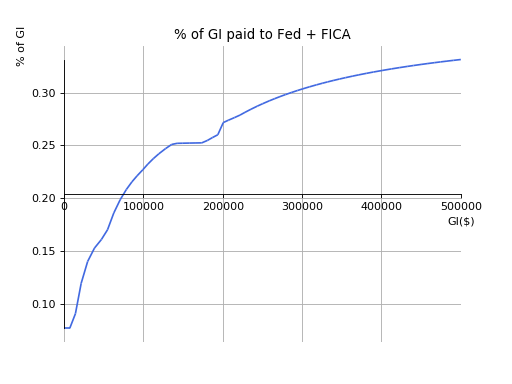

NOTE: Single salaried employee taking the standard deduction


In [10]:
plot4=sp.plotting.plot(fed_and_FICA.subs(deductions,STANDARD_DEDUCTION)/GI, (GI, 0, 500000),
                       title='% of GI paid to Fed + FICA', ylabel='% of GI', xlabel='GI($)', line_color='royalblue')
print("NOTE: Single salaried employee taking the standard deduction")

### View as take home pay (not considering state tax)

<IPython.core.display.Javascript object>


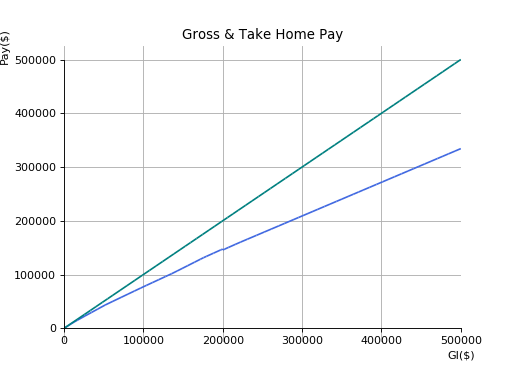

NOTE: Single salaried employee taking the standard deduction. Does not account for state tax


In [11]:
x = sp.symbols('x')
MAX_SALARY = 500000

post_tax_income = GI - fed_and_FICA.subs(deductions,STANDARD_DEDUCTION)
post_tax_plot=sp.plotting.plot(post_tax_income, (GI, 0, MAX_SALARY),
                       title='Gross & Take Home Pay', ylabel='Pay($)', xlabel='GI($)', line_color='royalblue', show=False)
no_fed_tax_plot = sp.plotting.plot(x, (x, 0, MAX_SALARY), line_color="teal", show=False)
post_tax_plot.append(no_fed_tax_plot[0])
post_tax_plot.show()
print("NOTE: Single salaried employee taking the standard deduction. Does not account for state tax")

## Lets add state tax into the mix
(still single tax payer taking standard deduction)
- https://www.tax-brackets.org/newyorktaxtable
- https://www.tax-brackets.org/californiataxtable


In [12]:
state_tax_ny=sp.Piecewise((0,                            AGI<0),
                          (000.00  + 0.0400*(AGI-00.00), AGI<=8500), 
                          (340.00  + 0.0450*(AGI-8500),  AGI<=11700),
                          (484.50  + 0.0525*(AGI-11700), AGI<=13900),
                          (599.50  + 0.0590*(AGI-13900), AGI<=21400),
                          (1042.0  + 0.0621*(AGI-21400), AGI<=80650),
                          (4721.43 + 0.0649*(AGI-80650), AGI<=215400),
                          (13466.7 + 0.0685*(AGI-215400),AGI<1077550),
                          (72523.98+ 0.0882*(AGI-1077550), True))

state_tax_ca=sp.Piecewise((0,                             AGI<0),
                          (000.00   + 0.0100*(AGI-00.00), AGI<=8809), 
                          (88.090   + 0.0200*(AGI-8809),  AGI<=20883),
                          (329.57   + 0.0400*(AGI-20883), AGI<=32960),
                          (812.65   + 0.0600*(AGI-32960), AGI<=45753),
                          (1580.23  + 0.0800*(AGI-45753), AGI<=57824),
                          (2545.91  + 0.0930*(AGI-57824), AGI<=295373),
                          (24637.97 + 0.0103*(AGI-295373),AGI<=354445),
                          (30722.38 + 0.0113*(AGI-354445),AGI<=590742),
                          (57423.94 + 0.0123*(AGI-590742),AGI<=1000000),
                          (107762.68+ 0.0133*(AGI-1000000), True))

### Compare NY vs CA state income tax

<IPython.core.display.Javascript object>


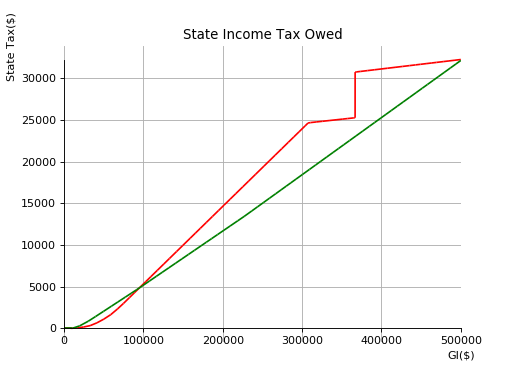

In [14]:
MAX_SALARY = 500000
ca_plot = sp.plotting.plot(state_tax_ca.subs(deductions, STANDARD_DEDUCTION), (GI, 0, MAX_SALARY),
                       title='State Income Tax Owed', ylabel='State Tax($)', xlabel='GI($)', line_color='red', show=False)
ny_plot = sp.plotting.plot(state_tax_ny.subs(deductions, STANDARD_DEDUCTION), (GI, 0, MAX_SALARY),
                       title='State Income Tax Owed', ylabel='State Tax($)', xlabel='GI($)', line_color='green', show=False)
ca_plot.append(ny_plot[0])
ca_plot.show()

## Federal + State tax liability

In [15]:
tax_liability_ca = state_tax_ca + fed_and_FICA
tax_liability_ny = state_tax_ny + fed_and_FICA

<IPython.core.display.Javascript object>


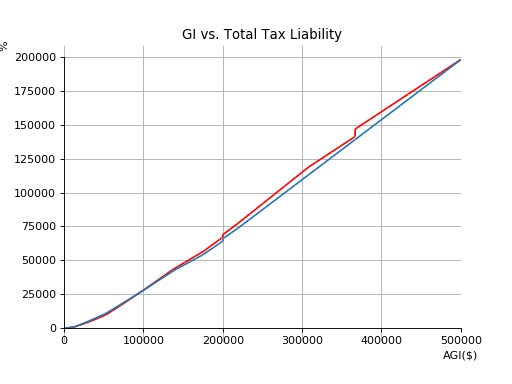

In [16]:
tot_tax = sp.plotting.plot(
    tax_liability_ca.subs(deductions, STANDARD_DEDUCTION), 
    tax_liability_ny.subs(deductions, STANDARD_DEDUCTION), 
    (GI, 0, MAX_SALARY), title='GI vs. Total Tax Liability', ylabel='%', xlabel='AGI($)', show=False)
tot_tax[0].line_color = 'red'
tot_tax.show()

<IPython.core.display.Javascript object>


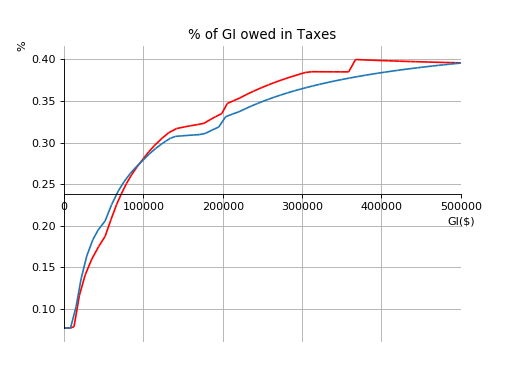

In [18]:
tot_perc_plot = sp.plotting.plot(
    tax_liability_ca.subs(deductions, STANDARD_DEDUCTION)/GI,
    tax_liability_ny.subs(deductions, STANDARD_DEDUCTION)/GI,
    (GI, 0, MAX_SALARY), title='% of GI owed in Taxes', ylabel='%', xlabel='GI($)', show=False)
tot_perc_plot[0].line_color = 'red'
tot_perc_plot.show()

The graph above shows the decreasing value of earned income as it reaches a ~40% asymptote. Here are a few notable benchmarks for this given scenario:
<ul>
    <li>At  ~50k earned income, we pay ~20% in taxes. For every \$1 we earn we get 80¢ </li>
    <li>At ~100k earned income, we pay ~27% in taxes. For every \$1 we earn we get 73¢ </li>
    <li>At ~200k earned income, we pay ~33% in taxes. For every \$1 we earn we get 67¢ </li>
    <li>At ~400k earned income, we pay ~39% in taxes. For every \$1 we earn we get 61¢ </li>
</ul>

This suggests that any investment that increases our gross income should be normalized when compared to an investment that gets taxed at a different rate. For example, and index fund that returns 7% annually vs a long term capital gain that returns 5% anually would become `0.7*(1-0.27)` vs `0.5*(1-0.15)` because long term capital gains get taxed at 15%\*. The after tax normalized comparison would be 5.11% vs 4.25% if our earned income is 100k<br>
At 250k earned income normalizing the same investments above we have: `0.7*(1-0.36)` vs `0.5*(1*0.15)` or 4.48% vs 4.25%. As you can see, as earned income gross, its become increasingly beneficial to seek sources of income that are 

\*in 2020, if making between 40,001 to $441,450

---

In order to reduce our tax liability we can try and *change the character* of our income. Above, we analyzed ordinary income (wages, salaries, commisions, bonuses, etc). Long term capital gains (assets held for more than a year) are usually taxed at a lower rate

Another way to reduce tax liability is to *increase our deductions* to an amount greater than `STANDARD_DEDUCTION` so that it becomes advantageous to itemize instead. Popular tax deductions are:

- Retirement account contribution (401k, IRA, HSA)
- Home mortgage (property tax + mortgage interest)
- Charitable contributions 

### Rough math on property tax and mortage interest

In [298]:
apy = 0.03892
home_price = 538000
down_payment_perc = 0.20
loan_len_years = 30

avg_ny_prop_tax = 0.01973

# M = P[r(1+r)^n/((1+r)^n)-1)]
monthly_mortgage_payment = (home_price - home_price*down_payment_perc)*( (apy/12)*(1+apy/12)**(loan_len_years*12)/( (1+apy/12)**(loan_len_years*12) -1))
tax_deduction_estiamte = round(monthly_mortgage_payment,3)*12 +  home_price*avg_ny_prop_tax
print("mortgage payment: ${}, property tax: ${}".format(round(monthly_mortgage_payment*12,2), home_price*avg_ny_prop_tax))
print("Guesstimated deductible amount ${}".format(tax_deduction_estiamte))

mortgage payment: $24337.05, property tax: $10614.74
Guesstimated deductible amount $34951.796
